In [10]:
import sys
import numpy as np
sys.path.insert(0, '../model_functions')
import primary_model as pm
import importlib
importlib.reload(pm)
# importlib.reload()

<module 'primary_model' from '../model_functions/primary_model.py'>

In [11]:
data_path = "../../data/cull%i/model_data/" % 1

devtest_aa_dict = np.load(data_path + 'devtest_aa_dict.npy')[()]
devtest_cmap_dict = np.load(data_path + 'devtest_cmap_dict.npy')[()]
train_aa_dict = np.load(data_path + 'train_aa_dict.npy')[()]
train_cmap_dict = np.load(data_path + 'train_cmap_dict.npy')[()]
valid_aa_dict = np.load(data_path + 'valid_aa_dict.npy')[()]
valid_cmap_dict = np.load(data_path + 'valid_cmap_dict.npy')[()]

In [14]:
model = pm.create_architecture(3, 60)

In [15]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        (None, None, 20)     0                                            
__________________________________________________________________________________________________
1d_convnet_layer1a (Conv1D)     (None, None, 20)     6820        input_layer[0][0]                
__________________________________________________________________________________________________
1d_convnet_batch_norm1a (BatchN (None, None, 20)     80          1d_convnet_layer1a[0][0]         
__________________________________________________________________________________________________
1d_convnet_layer1b (Conv1D)     (None, None, 20)     6820        1d_convnet_batch_norm1a[0][0]    
__________________________________________________________________________________________________
1d_convnet

In [17]:
model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        sample_weight_mode="temporal",
        metrics=['accuracy']
    )

In [18]:
history = model.fit_generator(
        pm.aa_generator(train_aa_dict, train_cmap_dict),
        validation_data=pm.aa_generator(valid_aa_dict, valid_cmap_dict),
        steps_per_epoch=5, 
        epochs=2,
        validation_steps=1,
        callbacks=pm.callbacks_list
    )

Epoch 1/2
2/5 [===========>..................] - ETA: 57s - loss: 5.6955 - acc: 0.6239 

KeyboardInterrupt: 

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
test = train_cmap_dict['1a0i']

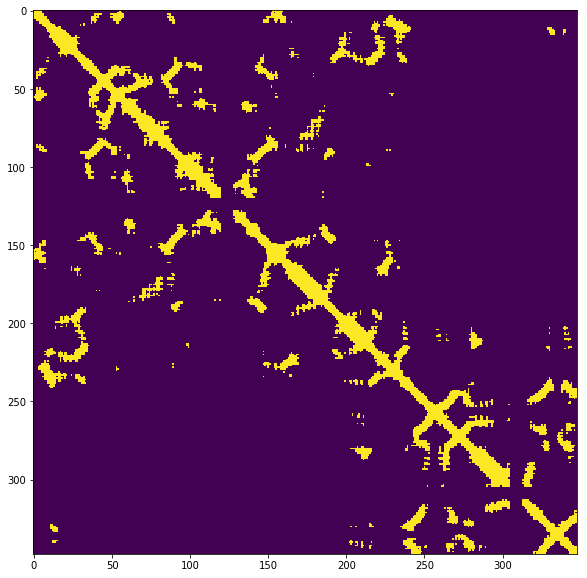

In [19]:
# sns.heatmap(test.astype(int))
plt.figure(figsize=(20,10))
plt.imshow(test,)